# **Семинар 9. Линейная регрессия**

## Регрессия. Теория

**Регрессия** - это методика, используемая для моделирования и анализа взаимосвязей между переменными

### Термины регрессии

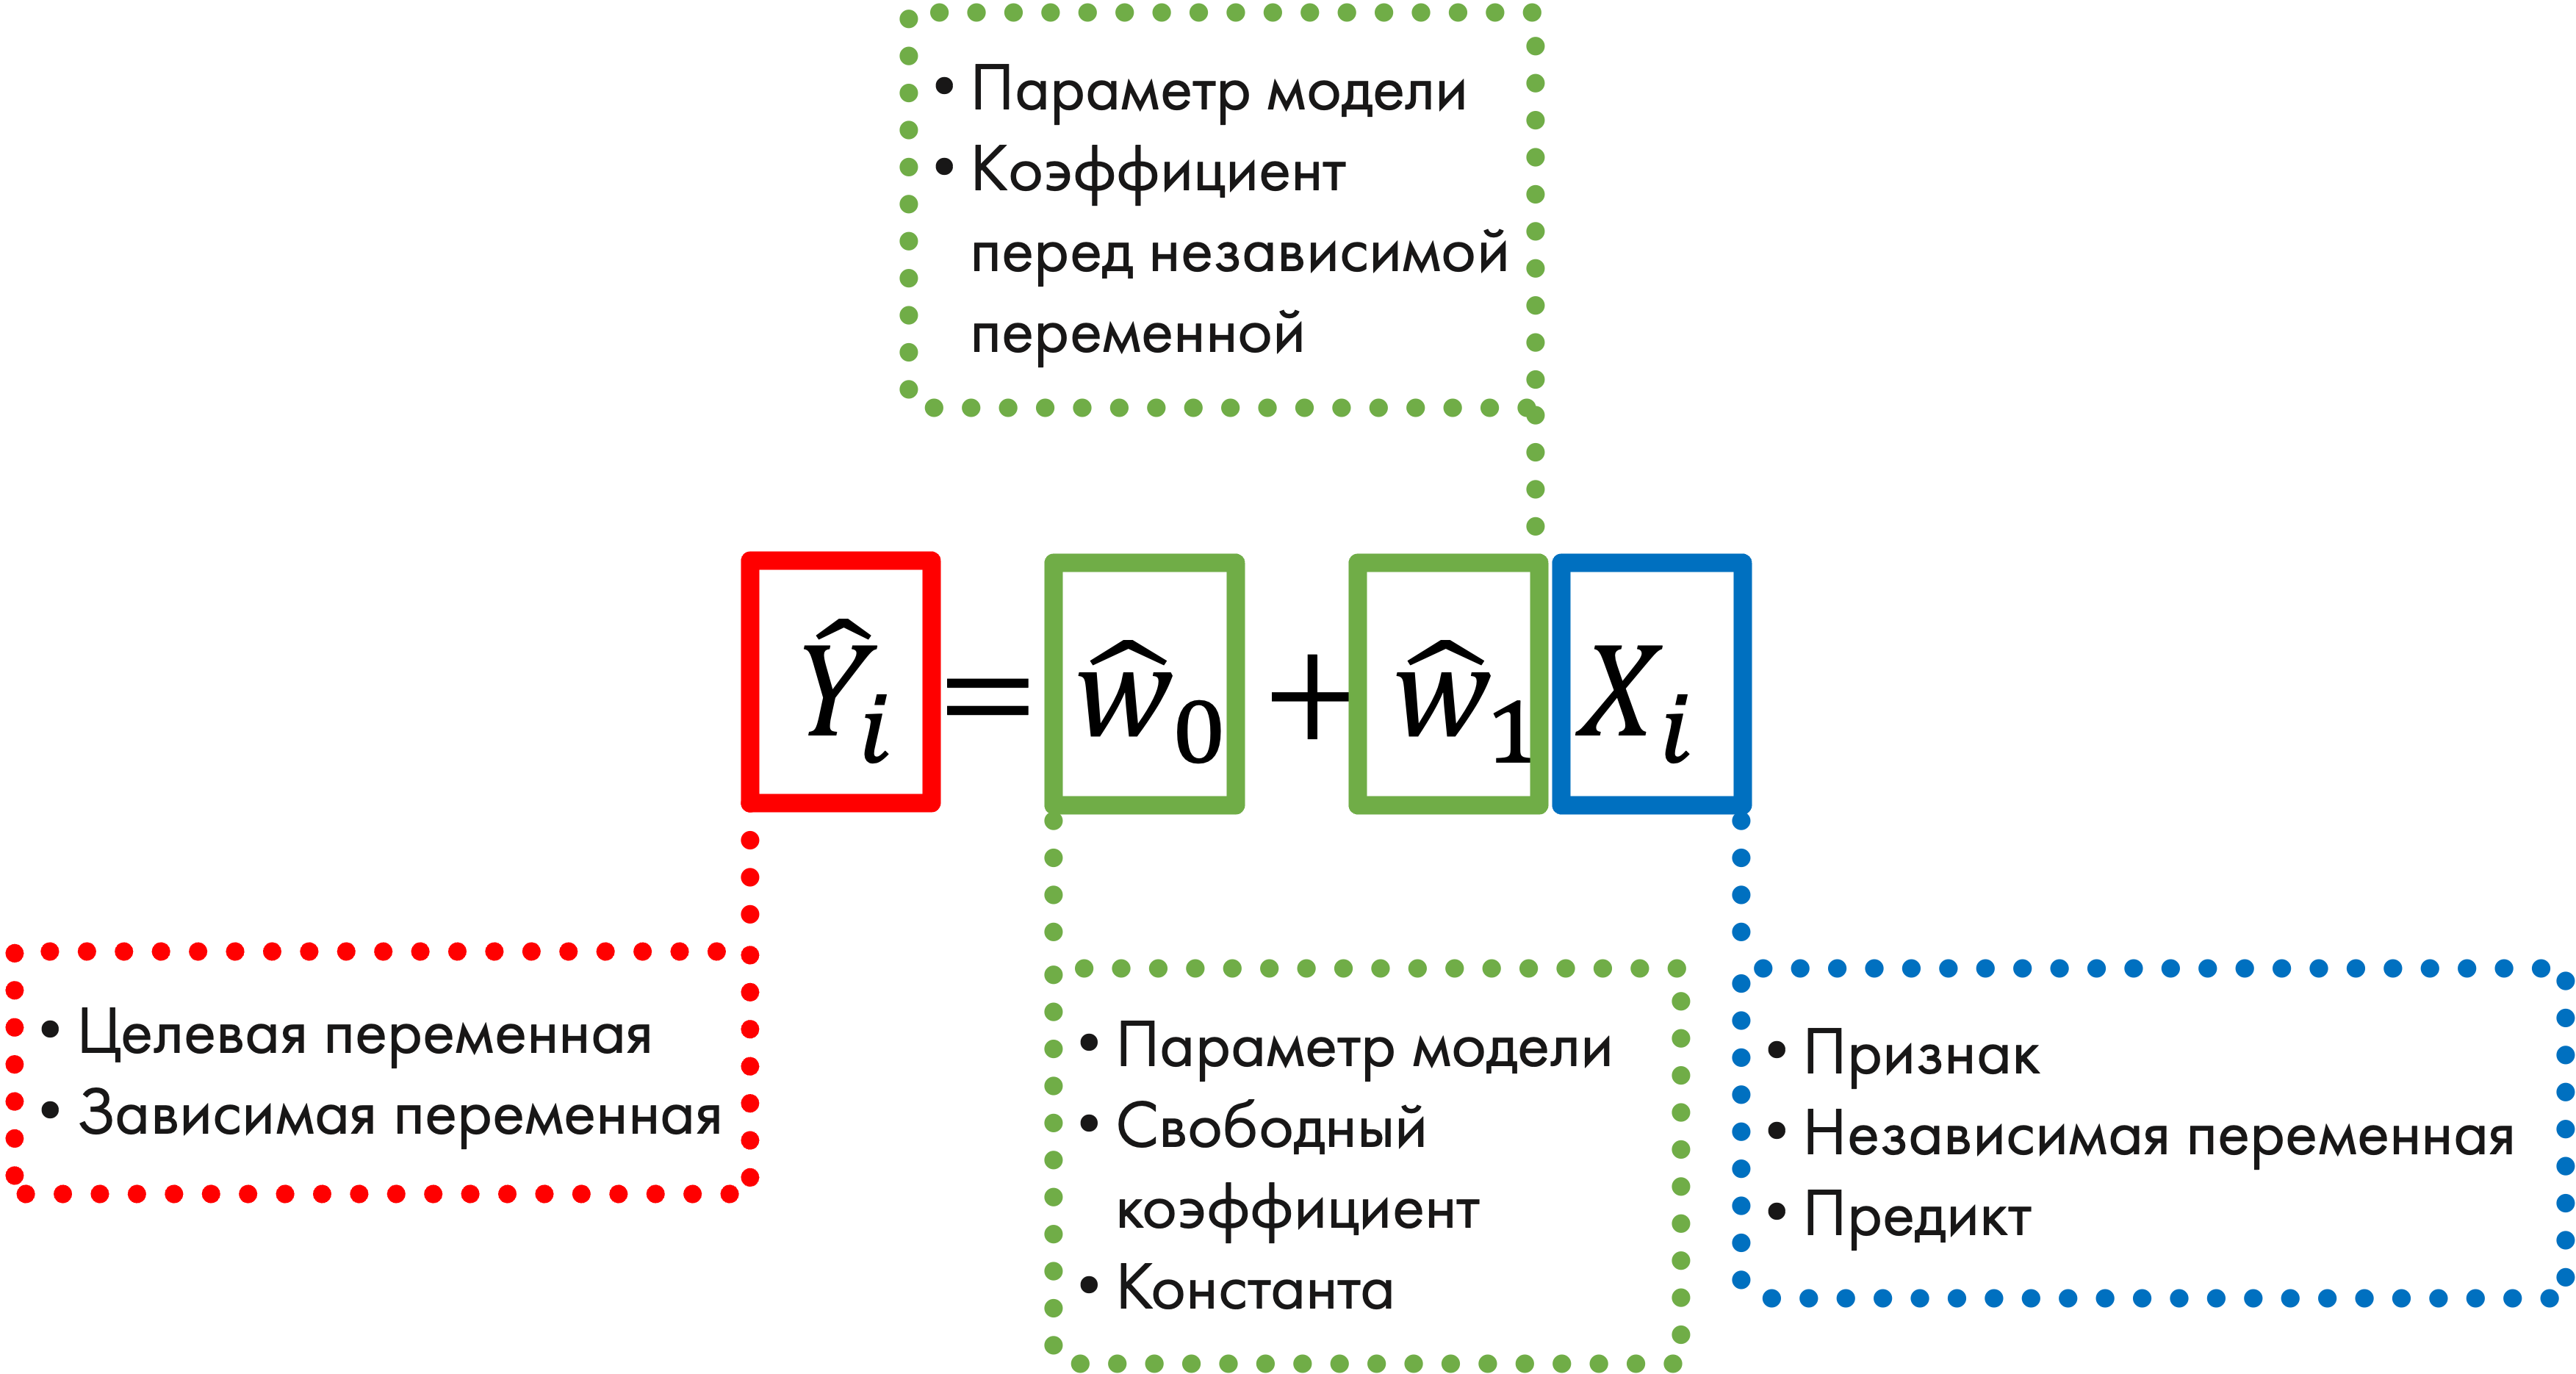

### Нахождение параметров регрессии

Найдем параметры регрессии, которая прогнозирует цену квартиры в зависимости от количества комнат

In [2]:
import pandas as pd
import numpy as np


data = pd.DataFrame()
data['Цена'] = [3000, 4000, 1500, 6000, 4000, 1650, 3250, 5000, 2500]
data['Кол-во комнат'] = [2, 2, 1, 4, 3, 1, 2, 3, 1]

data

,Цена,Кол-во комнат
0,3000,2
1,4000,2
2,1500,1
3,6000,4
4,4000,3
5,1650,1
6,3250,2
7,5000,3
8,2500,1


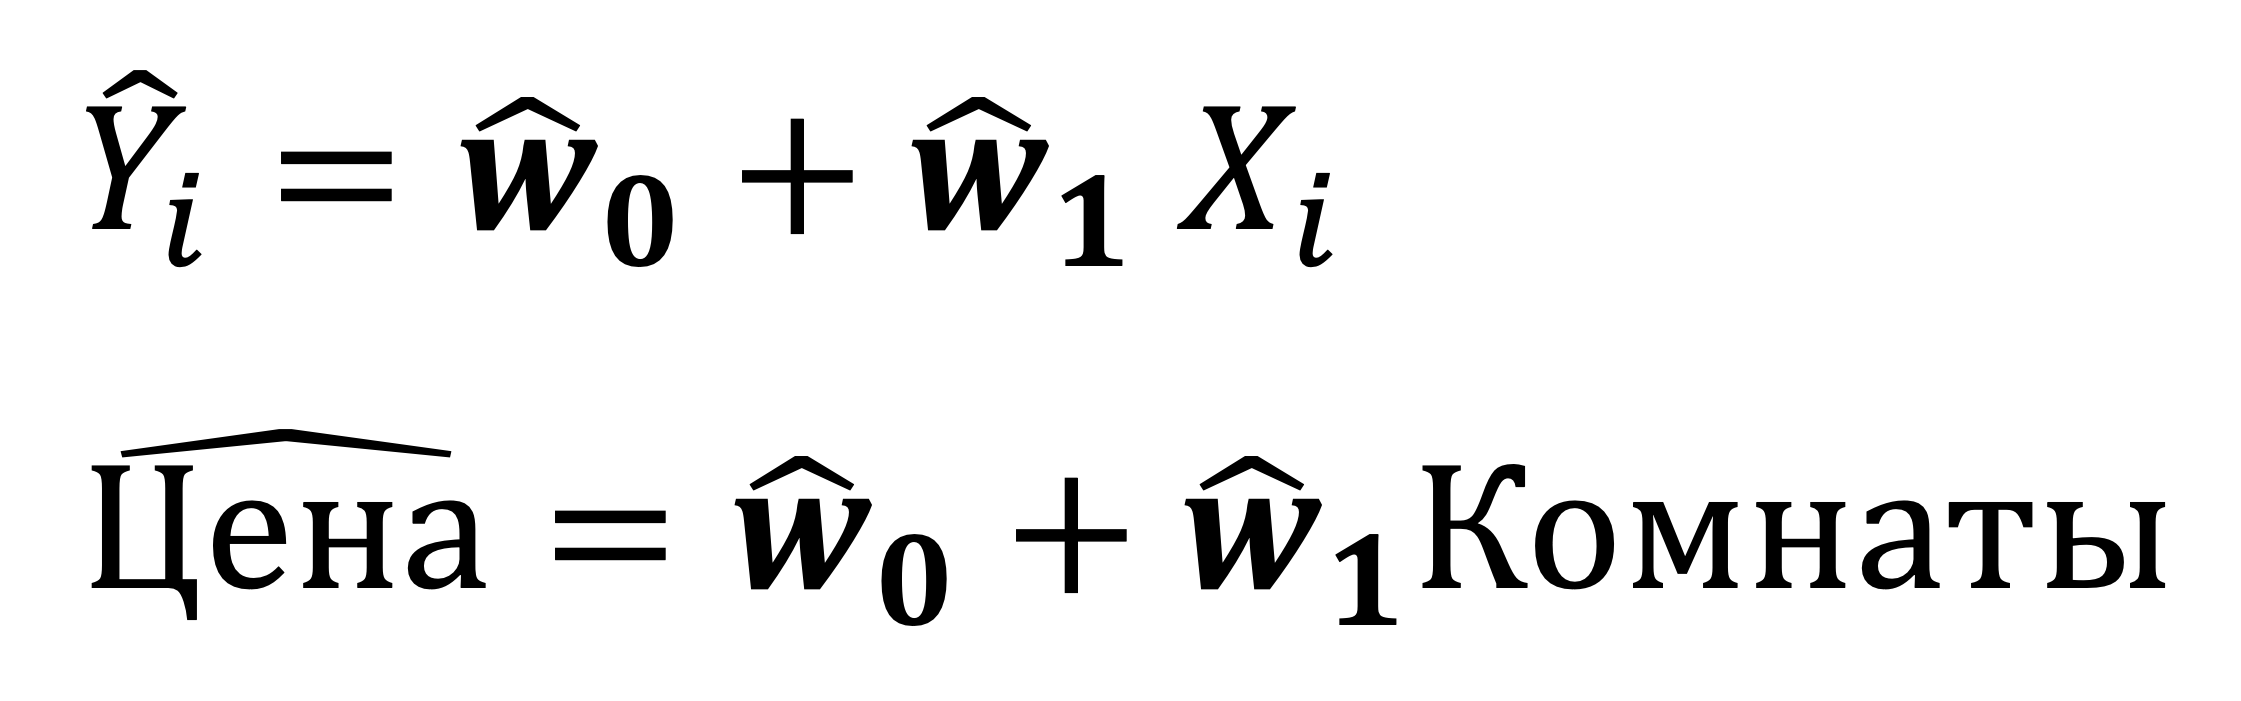

Найдем значение коэффициента перед независимой переменной:

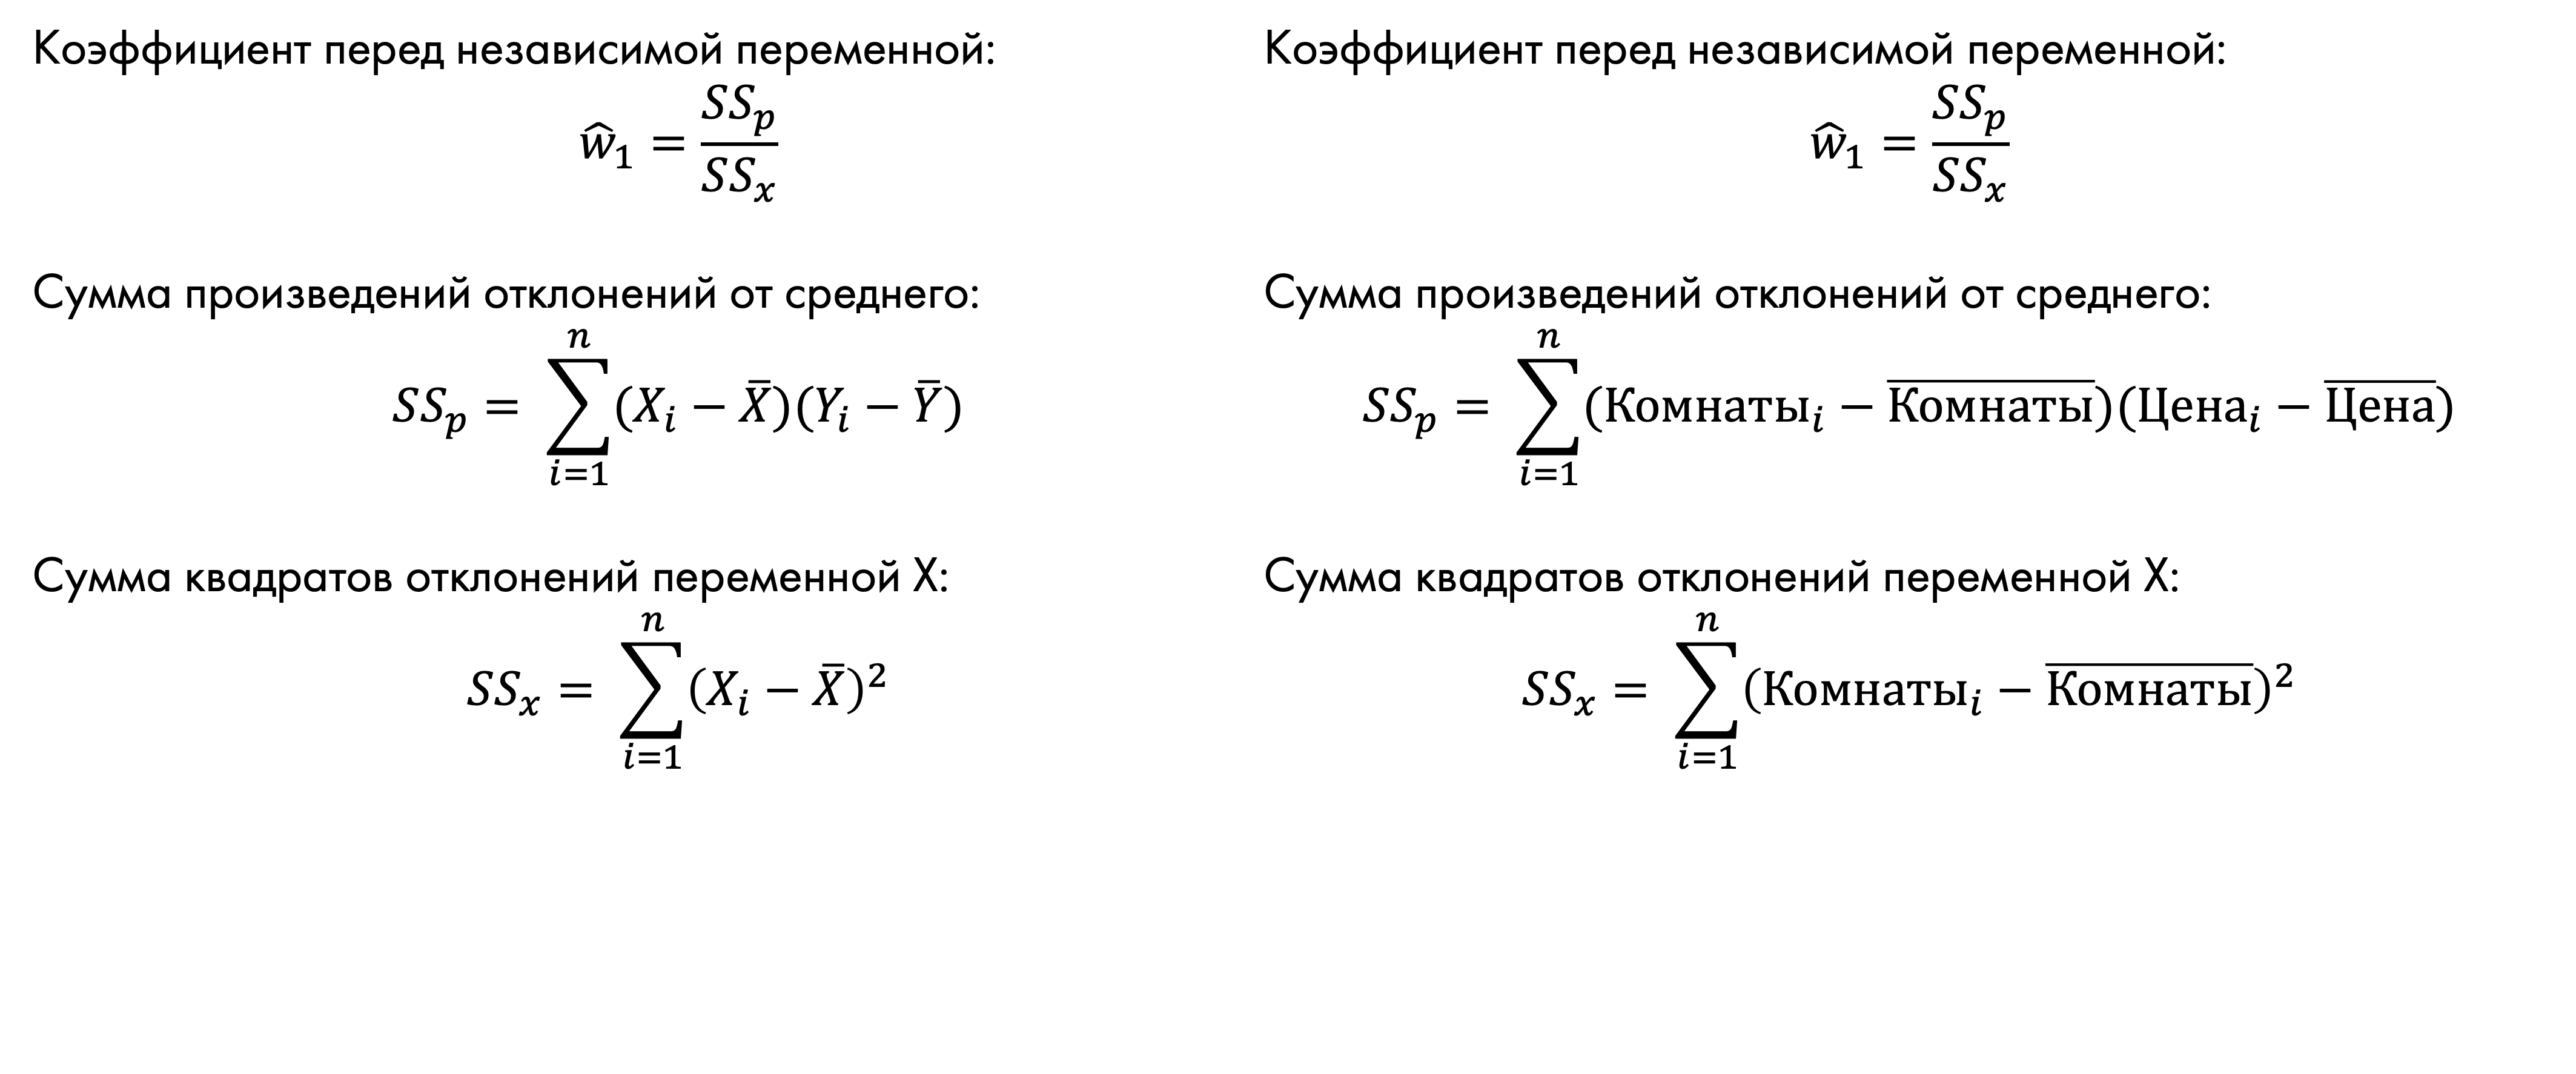

In [3]:
SSp = ((data['Кол-во комнат'] - data['Кол-во комнат'].mean()) 
       *  (data['Цена'] - data['Цена'].mean())).sum()

SSx = ((data['Кол-во комнат'] - data['Кол-во комнат'].mean()) ** 2).sum()

w1 = SSp/SSx
w1

1340.6249999999998

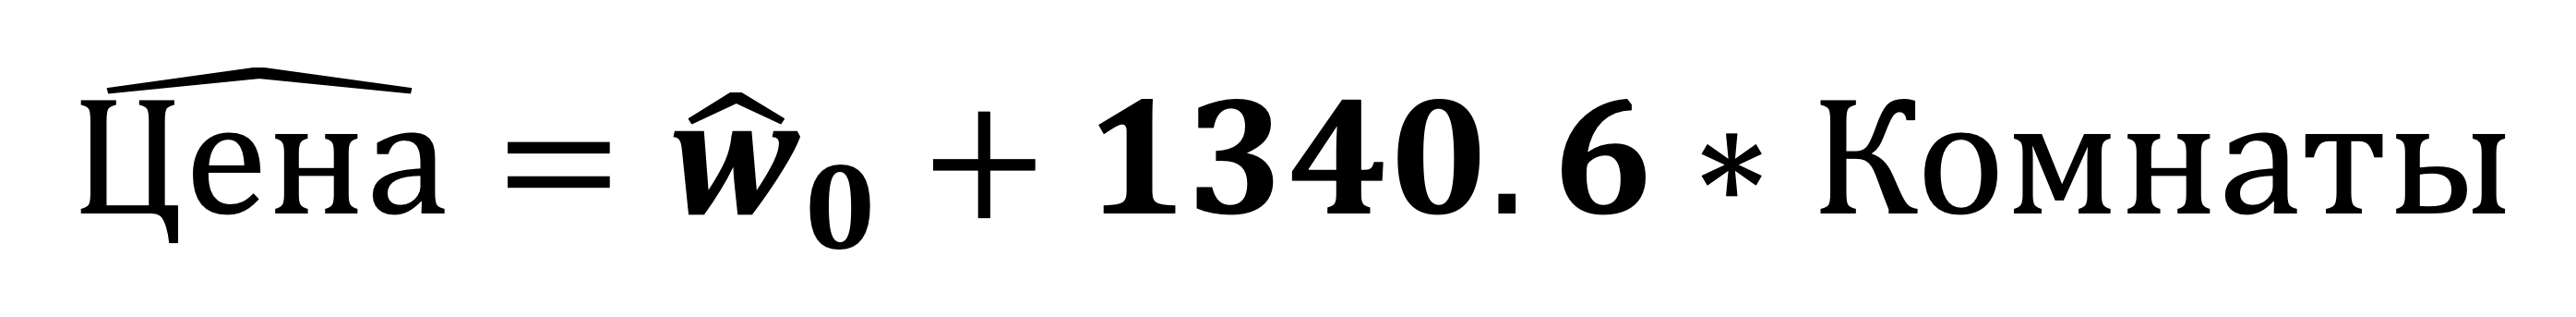

Найдем значение свободного коэффициента:

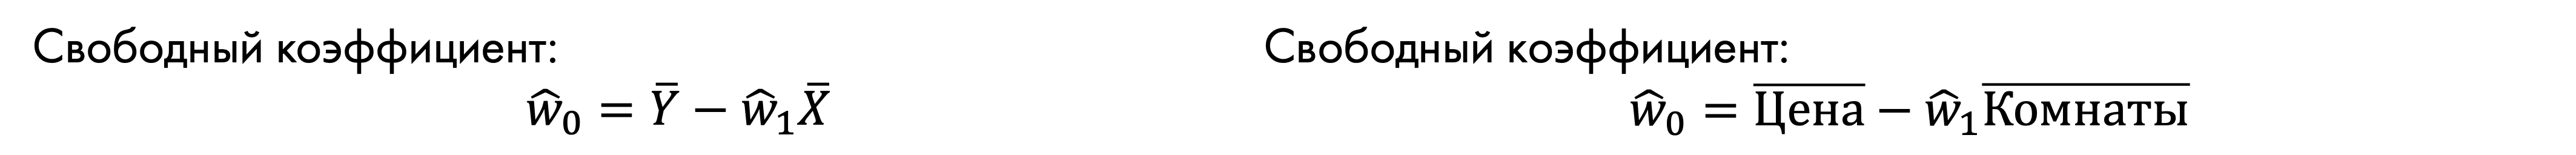

In [4]:
w0 = data['Цена'].mean() - w1 * data['Кол-во комнат'].mean()
w0

603.1250000000005

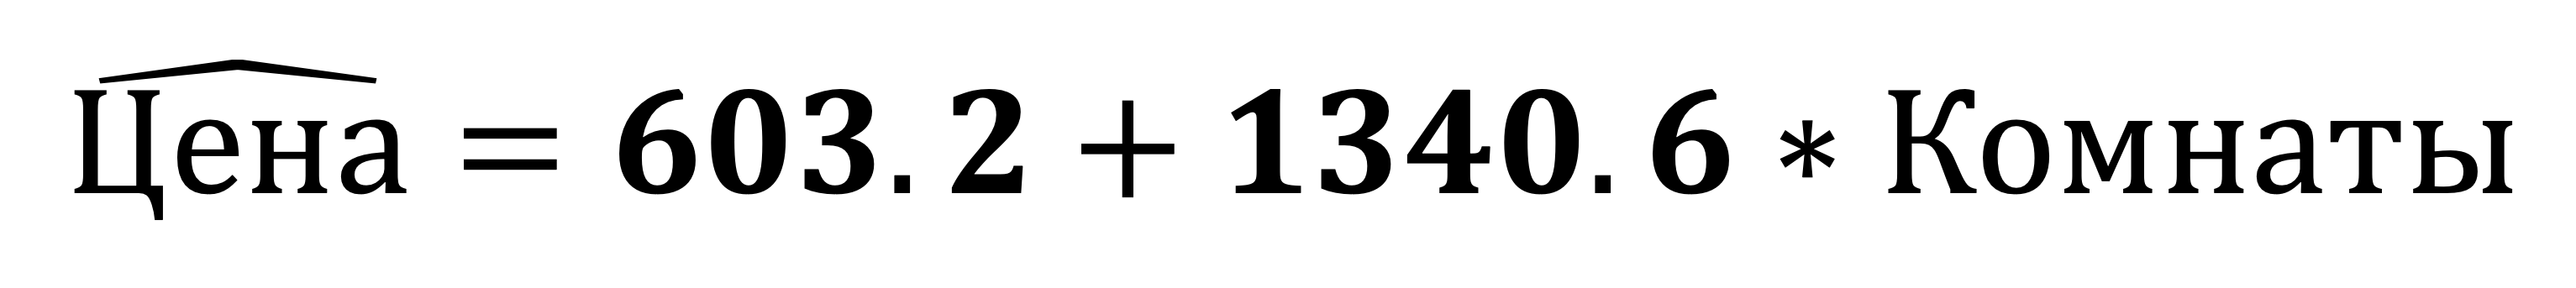

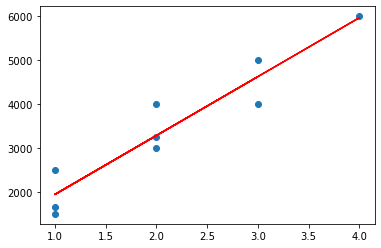

In [5]:
import matplotlib.pyplot as plt

plt.scatter(data['Кол-во комнат'], data['Цена'])
plt.plot(data['Кол-во комнат'], w0 + w1 * data['Кол-во комнат'], color = 'r');

### Смысл параметров и регрессии

#### **Геометрический**

**w0** - сдвиг по оси y

**w1** - угол наклона прямой

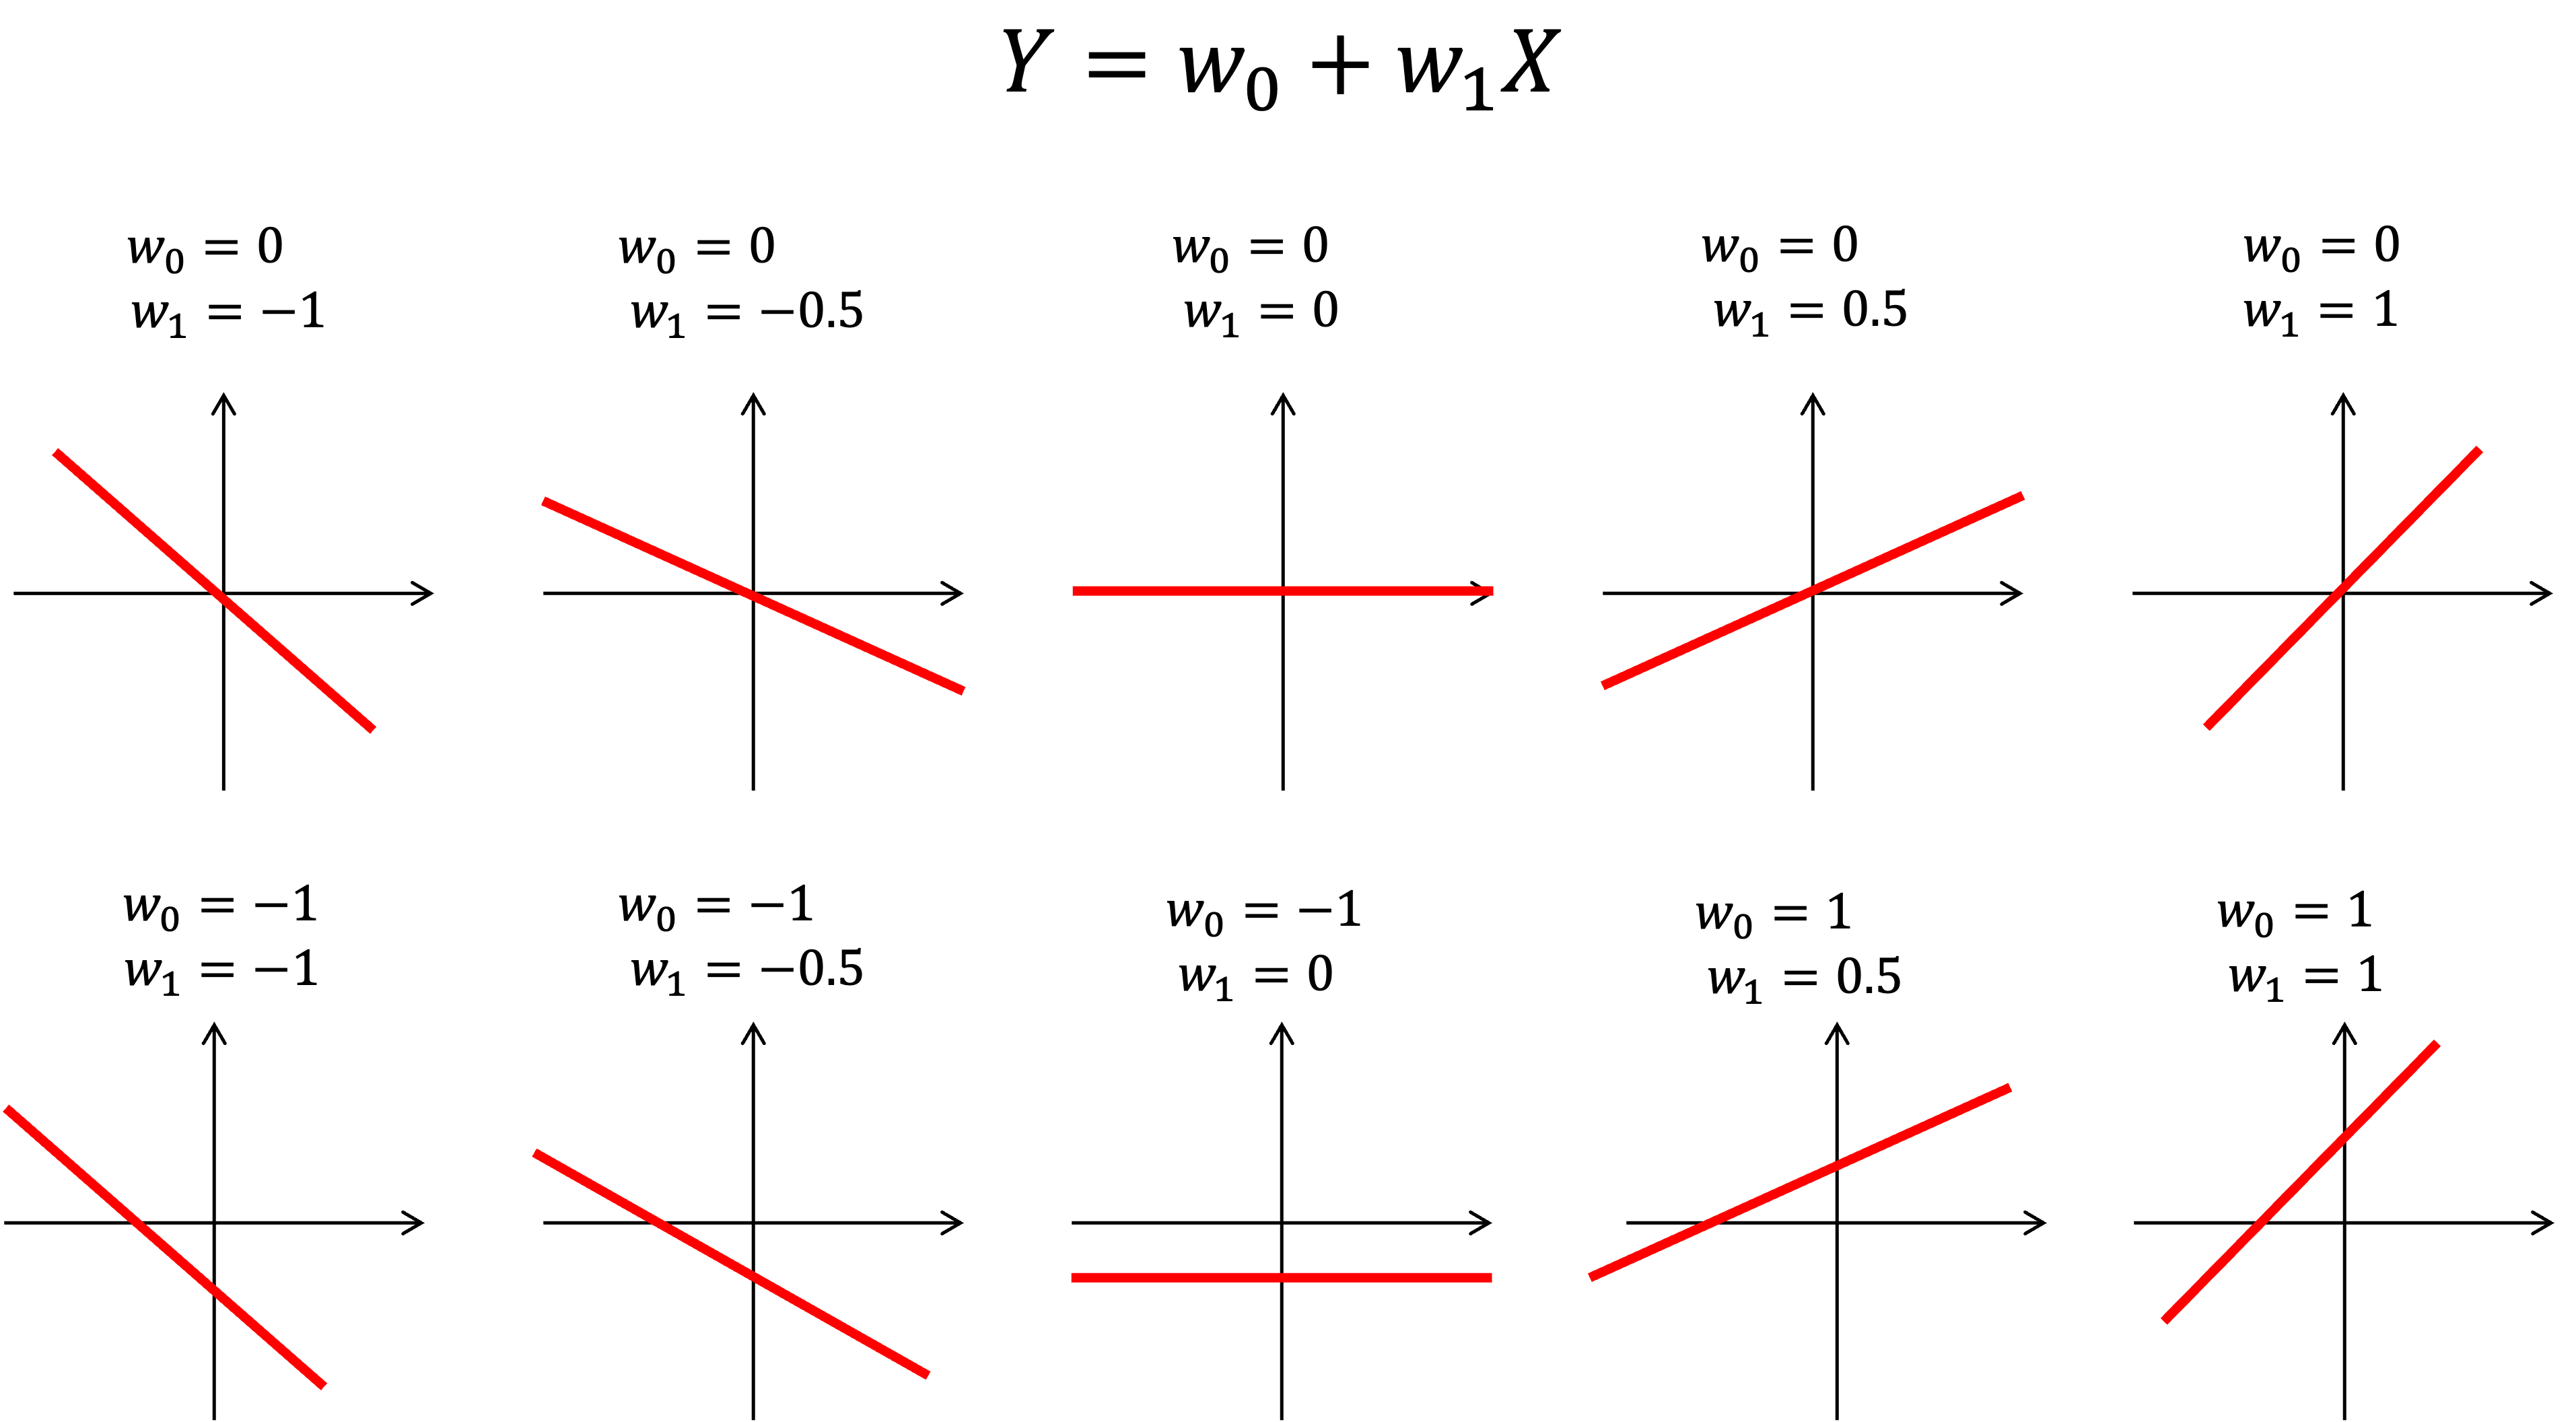

#### Практический

##### *В общем виде:*

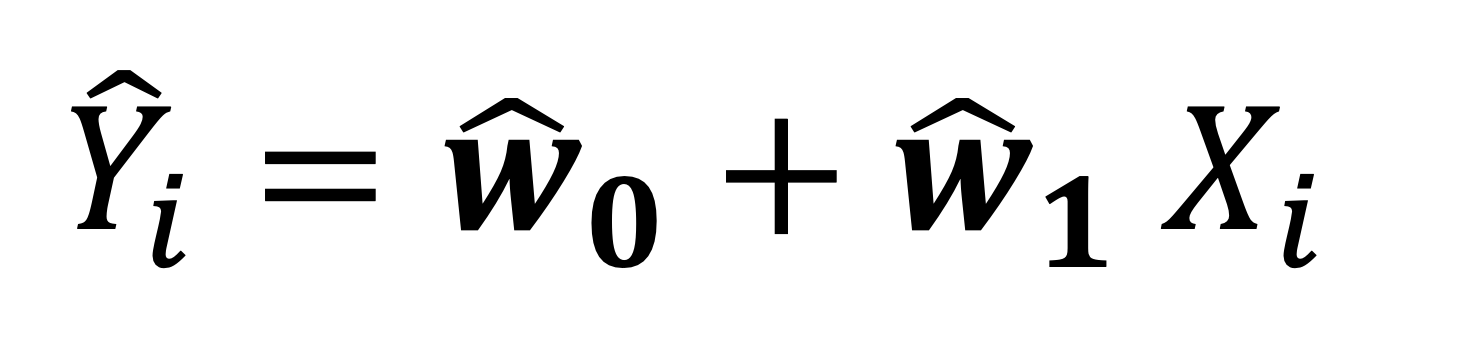

Всей регрессии:
- Если **независимая переменная** равна $N$, то **зависимая переменная** равна $w_0+w_1*X$


Коэффициент $w1$ (коэффициент перед $X$):

- Если $w_1>0$:

В среднем при **увеличении** независимой переменной **на единицу** **зависимая переменная** **увеличивается на w1**

- Если $w_1<0$:

В среднем при **увеличении** независимой переменной **на единицу** **зависимая переменная** **снижается на w1**

- Если $w_1=0$:

Независимая переменная **не оказывает влияние** на целевую переменную

Коэффициент $w_0$ (свободный коэффициент):

- Если независимая переменная равна 0, то зависимая переменная равна $w_0$

*(не всегда можно интерпретировать)*

##### *Пример:*

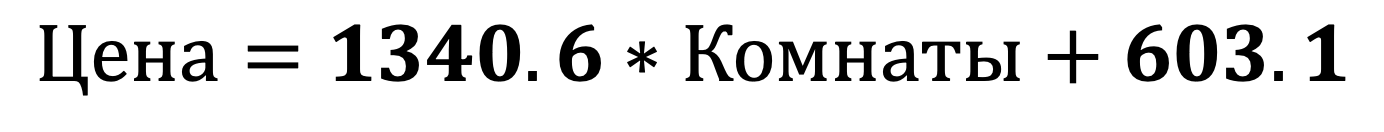

- Если в квартире **1 комната**, то **цена** квартиры будет в среднем **1943.7**

- Если в квартире **7 комнат**, то **цена** квартиры будет в среднем **9987.3**

- ...

Коэффициент $w_1$ (коэффициент перед **x**):

- В среднем при **увеличении** количества комнат **на единицу** **цена** квартиры **увеличивается на 1340.6**

Коэффициент $w_0$ (свободный коэффициент):

- В данном случае коэффициент **w0** интерпретировать нельзя, потому что количество комнат не может быть равным 0

> Но, например, если наше уравнение регрессии описывает влияние уровня коррупции на ВВП страны:

> $ВВП (трлн. \$) = 10 * Ур.коррупции +200$

> то свободный коэффициент **200** можно интерпретировать следующим образом:

> - Если в стране **0 уровень коррупции**, то в **ВВП** страны будет равен **200 трлн. $**

### Оценка качества регрессии

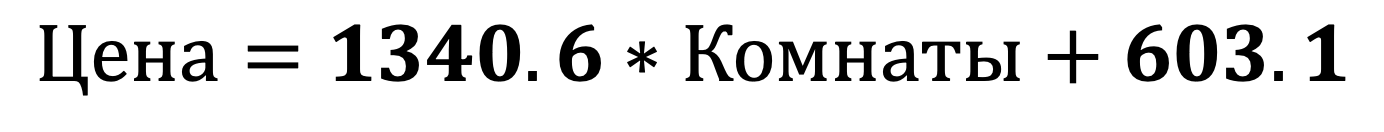

Мы не можем бездумно верить полученным параметрам, нам нужно удостовериться, что полученное уравнение регрессии (наша прямая) достаточно хорошо описывает изначальные данные. Сделать это можно с помощью метрик качества регрессии:

*   $MSE$ (среднеквадратичная ошибка)
*   $MAE$ (cредняя абсолютная ошибка)
*   $R^2$ (коэффициент детерминации)

#### MSE – среднеквадратичная ошибка

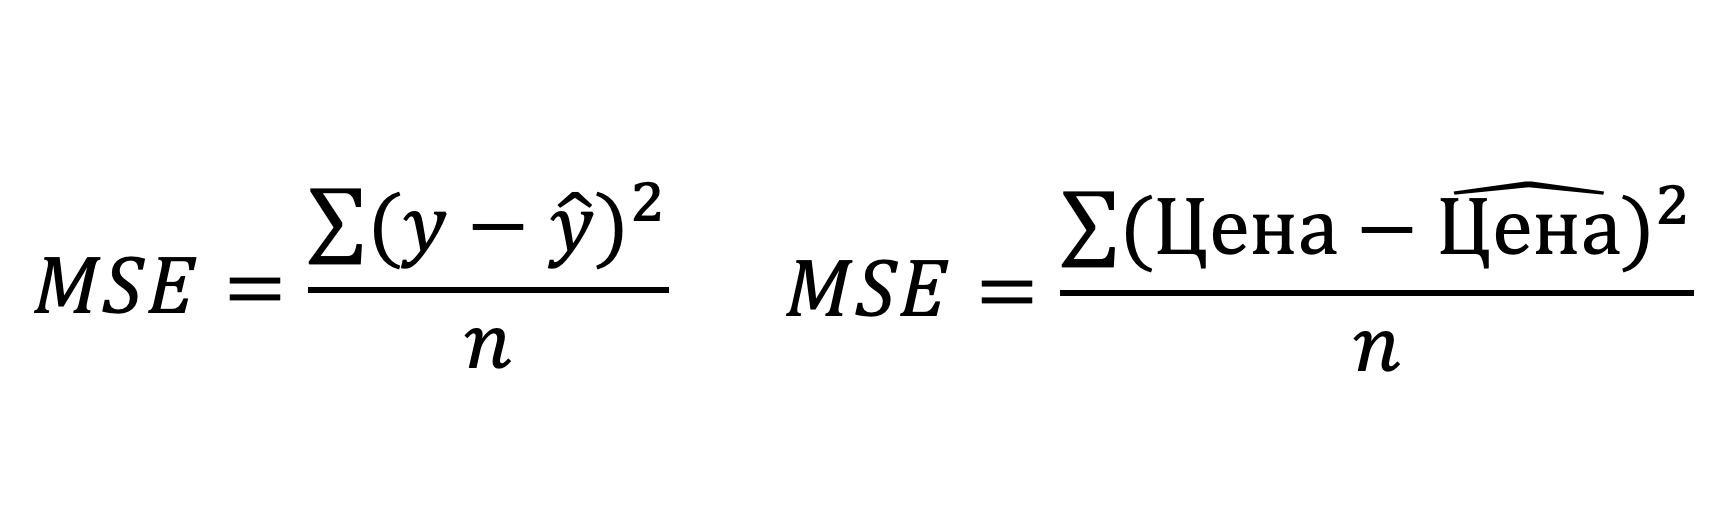

In [6]:
data["Цена_прогноз"] = 1340.6 * data["Кол-во комнат"] + 603.1
data

,Цена,Кол-во комнат,Цена_прогноз
0,3000,2,3284.3
1,4000,2,3284.3
2,1500,1,1943.7
3,6000,4,5965.5
4,4000,3,4624.9
5,1650,1,1943.7
6,3250,2,3284.3
7,5000,3,4624.9
8,2500,1,1943.7


In [7]:
MSE = ((data["Цена"]-data["Цена_прогноз"])**2).sum() / data.shape[0]
MSE

191024.31222222222

Полученное значение является относительными, и четкой границы между хорошей и плохой моделью нам не дает. Но благодаря MSE мы можем сравнивать модели между собой:
- наилучшей будет та, у которой значение **MSE меньше**



#### MAE – cредняя абсолютная ошибка

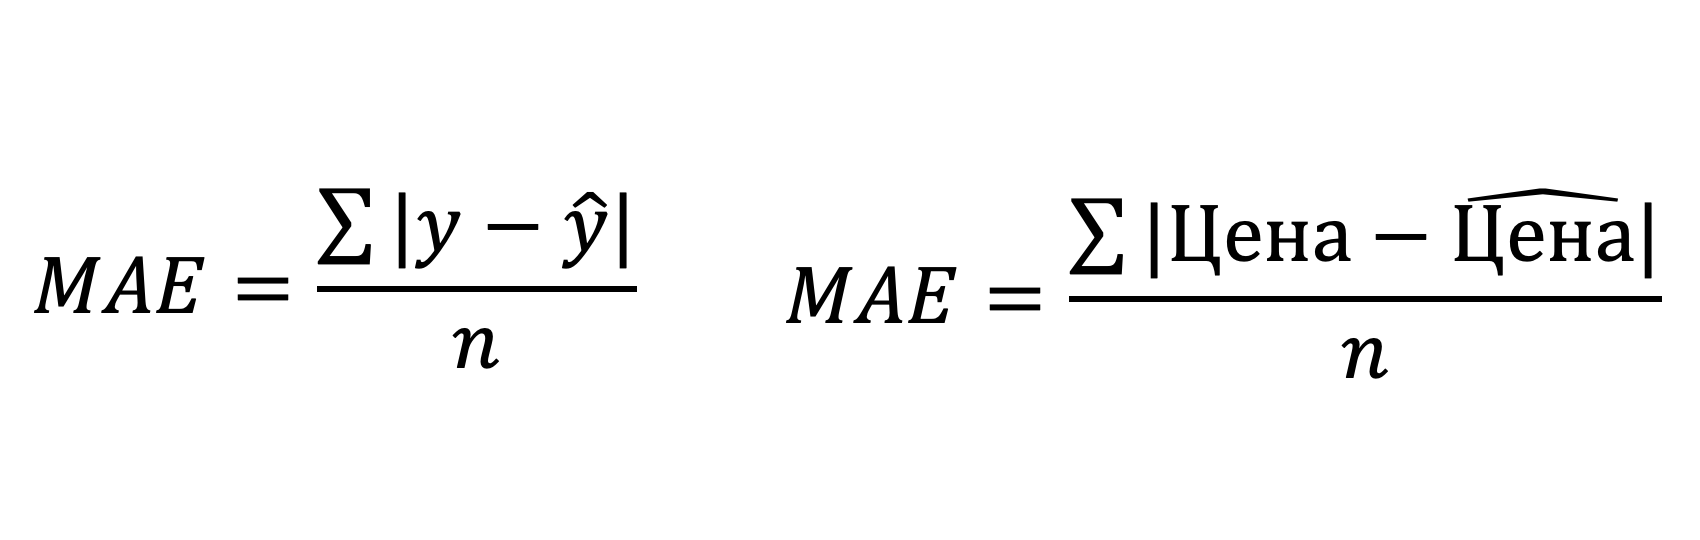

In [8]:
MAE = abs(data['Цена']- data['Цена_прогноз']).sum()/data.shape[0]
MAE

373.6111111111111

Полученное значение является относительными, и четкой границы между хорошей и плохой моделью нам не дает. Но благодаря MAE мы можем сравнивать модели между собой:
- наилучшей будет та, у которой значение **MAE меньше**

#### $R^2$ – коэффициент детерминации

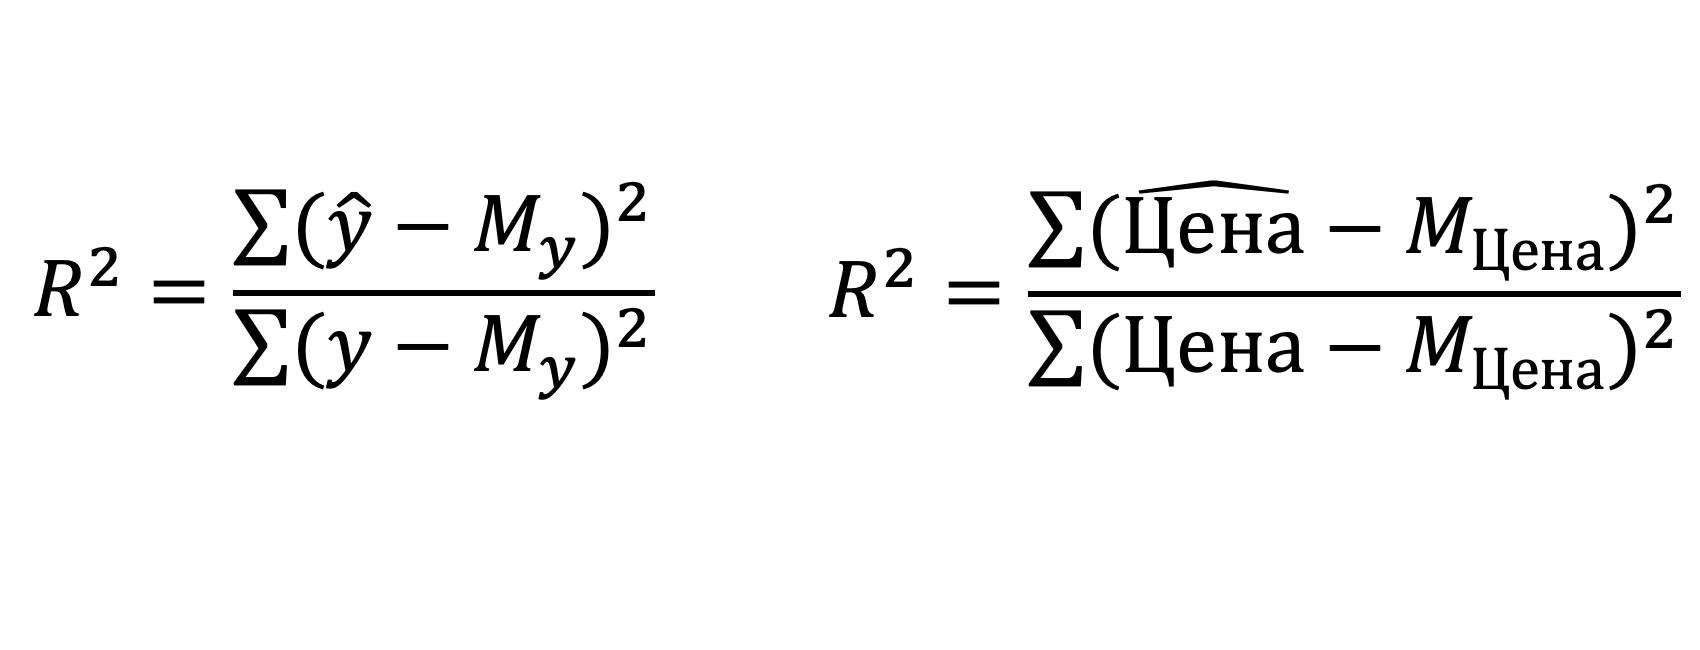

In [9]:
data['(Цена_прогноз-Цена_ср)^2'] = (data['Цена_прогноз']-data['Цена'].mean())**2

data[['Цена_прогноз', '(Цена_прогноз-Цена_ср)^2']]

,Цена_прогноз,(Цена_прогноз-Цена_ср)^2
0,3284.3,2.221093e+04
1,3284.3,2.221093e+04
2,1943.7,2.219007e+06
3,5965.5,6.411868e+06
4,4624.9,1.419831e+06
5,1943.7,2.219007e+06
6,3284.3,2.221093e+04
7,4624.9,1.419831e+06
8,1943.7,2.219007e+06


In [10]:
up = data['(Цена_прогноз-Цена_ср)^2'].sum()
up

15975185.476666667

In [11]:
data['(Цена-Цена_ср)^2'] = (data['Цена']-data['Цена'].mean())**2

data[['Цена', '(Цена-Цена_ср)^2']]

,Цена,(Цена-Цена_ср)^2
0,3000,1.877778e+05
1,4000,3.211111e+05
2,1500,3.737778e+06
3,6000,6.587778e+06
4,4000,3.211111e+05
5,1650,3.180278e+06
6,3250,3.361111e+04
7,5000,2.454444e+06
8,2500,8.711111e+05


In [12]:
down = data['(Цена-Цена_ср)^2'].sum()
down

17695000.0

In [13]:
r2 = up/down
r2

0.9028078822642931

Это значит, что мы можем объяснить с помощью нашего уравнения до **90%** разброса данных.

- Чем ближе коэффициент детерминации к 1, тем лучше наша модель, хорошей . Параметрам модели можно начинать верить, если **$R^2$ больше 0.5**. Такую модель можно считать приемлемой. Если **$R^2$ больше 0.7**, то модель можно считать хорошей.

### Типы регрессий

С точки зрения количество используемых факторов регрессия бывает:
- **однофакторная**

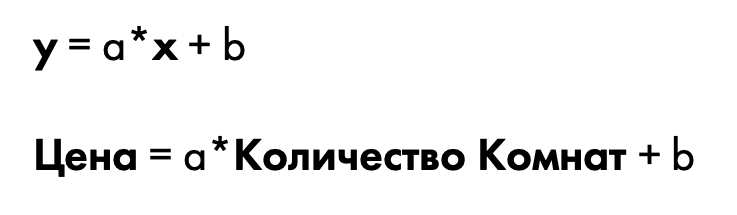

-  **многофакторная**

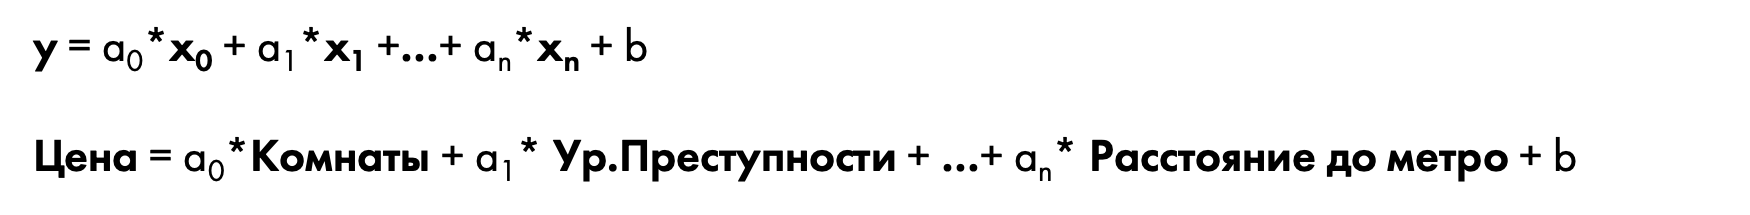

## A12

Мы исследуем факторы, влияющие на стоимость квартиры. Что из перечисленных ниже признаков будет являться целевой / зависимой переменной?

 - Цена на квартиру
 - Этаж, на котором находится квартира
 - Площадь квартиры
 - Расстояние до метро

## A13

Мы решаем задачу диагностирования сердечно-сосудистого заболевания для выборки пациентов. Чем является возраст пациента в этой задаче?

- Объектом / Наблюдением
- Параметром модели
- Признаком / Независимой переменной
- Целевой переменной / Зависимой переменной

## A14(1)

Допустим, мы предсказываем, сколько сотрудников уволятся из компании в ближайшем месяце.

Мы решили использовать **квадратичную функцию потерь**: ошибка на конкретном объекте вычисляется по формуле (прогноз – факт) в квадрате, где под прогнозом понимается прогноз модели, а под фактом — настоящее количество уволившихся.

У нас есть данные за три месяца (по сути, три наблюдения), на которых мы протестировали модель. В таблице представлены результаты.

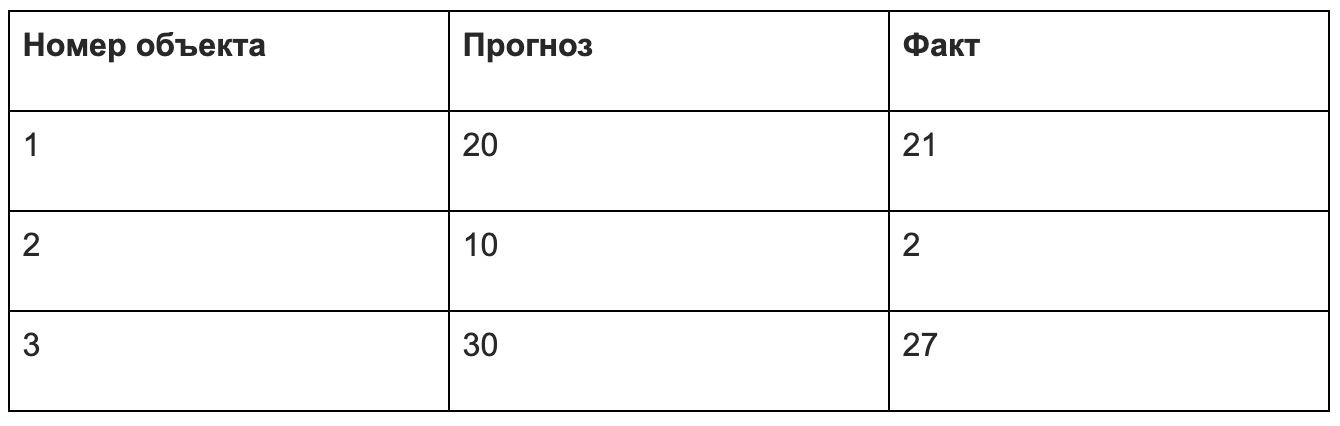

Выберите верные утверждения:


- Наименьшее значение функции потерь получается на первом объекте
- Наибольшее значение функции потерь получается на втором объекте
- Модель всегда идеально угадывает число уволившихся
- Наибольшее значение функции потерь получается на третьем объекте


In [14]:
print((20-21)**2)
print((10-2)**2)
print((30-27)**2)

1
64
9


## A14(2)

Аналитик Анатолий построил модель, которая предсказывает количество обращений в техническую поддержку в зависимости от количества часов, прошедших с начала рабочего дня.

На графике изображена получившаяся модель (синим) и реальные данные за первую половину текущего рабочего дня (красным).

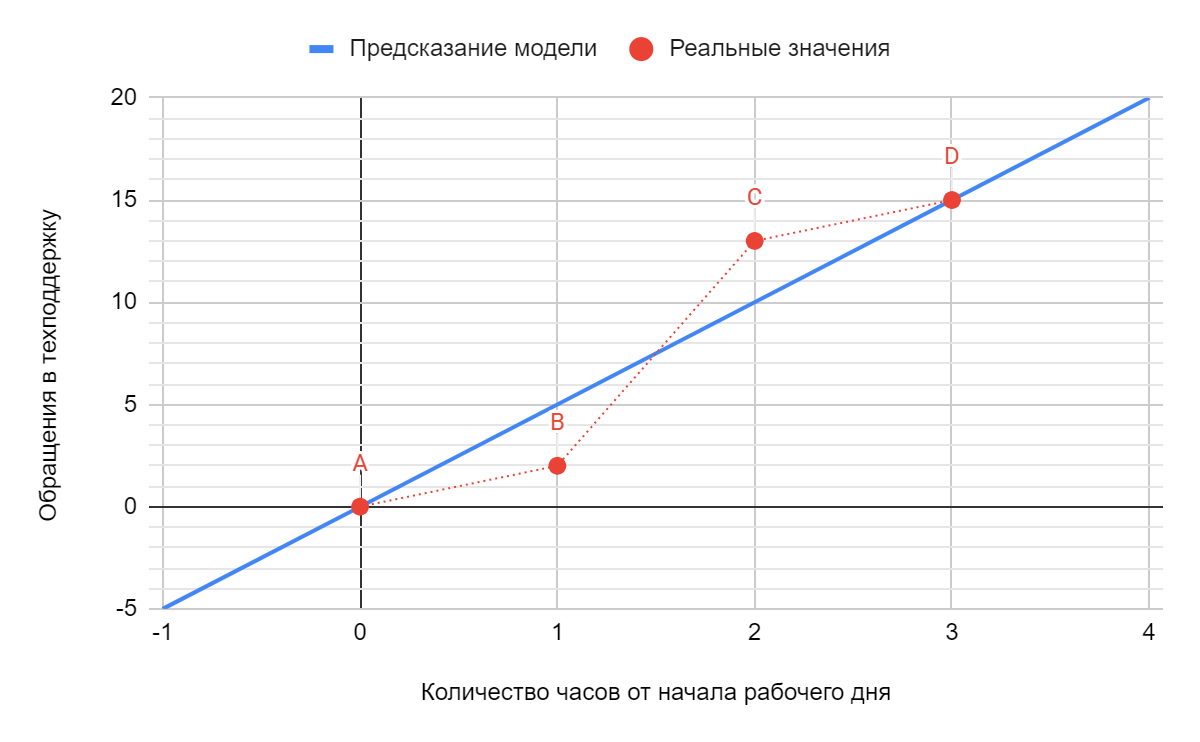

Выберите верные утверждения:

* Среднеквадратичная ошибка равна 0
* Среднеквадратичная ошибка равна 6
* Ошибка предсказания модели для 2 часов от начала рабочего дня больше, чем для 0 часов от начала рабочего дня
* Если просуммировать отклонения реальных значений от предсказания, получится 0

In [15]:
[0, 2, 13, 15]
[0, 5, 10, 15]

[0, 5, 10, 15]

In [16]:
((2-5)**2 + (13-10)**2 + (15-15)**2) / 4

4.5

In [17]:
0-0 + 2-5 + 13-10 + 15-15

0

## A15(1)

Мы решаем задачу определения зарплаты, которую предложат кандидату, по описанию вакансии. У нас четыре признака: A, B, C и D. Каждый из них равен нулю или единице в зависимости от наличия в описании того или иного слова. Для признака **A** это слово **“старший”**; для признака **B** — **“выпускник”**, для **C** — **“программирование”**, для **D** — **“Москва”**. Модель вычисляет зарплату в рублях по формуле

30000 + 20000*A - 10000*B + 20000*C + 10000*D,  

Выберите верное утверждение об этой модели:


- Если в описании вакансии нет слов “старший”, “выпускник”, “программирование” и “Москва”, то предсказывается зарплата 70 тысяч рублей.
- Если в описании вакансии нет слов “старший”, “выпускник”, “программирование” и “Москва”, то предсказывается зарплата 30 тысяч рублей.
- Если в описании вакансии нет слов “старший”, “выпускник”, “программирование” и “Москва”, то предсказывается зарплата 0 рублей.
- Если в описании вакансии нет слов “старший”, “выпускник”, “программирование” и “Москва”, то предсказывается зарплата 20 тысяч рублей.

## A15(2)

Пиццерия определяет цену заказанной пиццы при помощи следующей формулы:

**Цена (в рублях) = 200 + 40Р + 50С**,

Где Р - диаметр пиццы в сантиметрах, С - количество заказанных соусов.

Самая маленькая пицца из доступных имеет диаметр 20 см, а самая большая - 40 см. С пиццей можно заказать любое количество соусов, от нуля до бесконечности. Без пиццы соусы заказать нельзя.

Выберите ВСЕ верные утверждения:


* Невозможно сделать заказ на сумму больше 1800 рублей


* Невозможно сделать заказ на сумму больше 1500 рублей


* Невозможно сделать заказ на сумму меньше 1000 рублей


* Невозможно сделать заказ на сумму меньше 200 рублей

In [18]:
200 + 40 * 20 + 0 * 50 # с пиццей и без соусов

1000

In [19]:
200 + 0 * 20 + 0 * 50 # без пиццы и без соуса

200

In [20]:
200 + 40 * 40 + 50 * 1000000

50001800

## B1

Экономист Василий построил линейную модель для предсказания скорости речи попугая по выборке из пяти наблюдений. Ниже приведены истинные значения скорости речи (𝑌) и прогнозы модели Василия (𝑍):

𝑌 = [12, 40, 8, 60, 61].

𝑍 = [9, 36, 10, 57, 62].

Определим ошибку модели Василия как усредненную сумму квадратов разностей между истинными и прогнозируемыми значениями скорости речи:

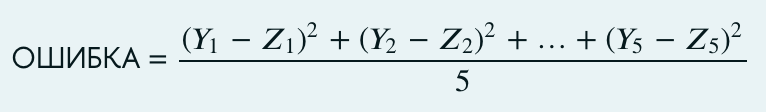

Вычислите значение ошибки для модели Василия. Ответ округлите до сотых.

Пример ответа: 42.10

In [21]:
import pandas as pd
df = pd.DataFrame()

df["y"] = [12, 40, 8, 60, 61]
df["z"] = [9, 36, 10, 57, 62]
df

,y,z
0,12,9
1,40,36
2,8,10
3,60,57
4,61,62


In [22]:
((df["y"]-df["z"])**2).sum()/5

7.8

## B2

Исследователи обнаружили некоторую взаимосвязь между ранним выходом на пенсию и ухудшением памяти. В нескольких странах было проведено исследование памяти для мужчин и женщин 60-64 лет, которые вышли на пенсию в разном возрасте. В таблице ниже для каждой страны записано среднее значение по этому тесту для всех респондентов, проживающих в ней, а также процент опрошенных, которые в момент прохождения теста уже были на пенсии. На основании данных ответьте на следующие вопросы.

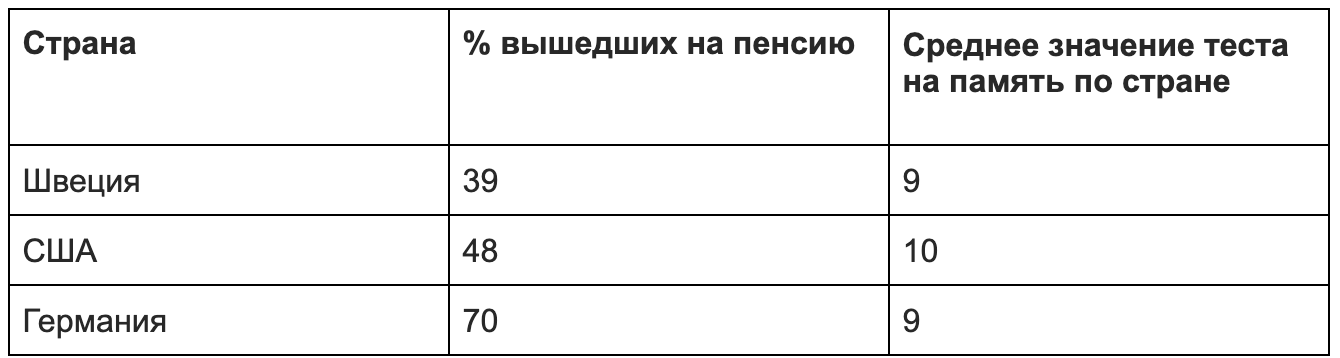

In [23]:
df = pd.DataFrame()
df.index = ["Ш", "С", "Г"]
df["ret"] = [39, 48, 70]
df["mem"] = [9, 10, 9]
df

,ret,mem
Ш,39,9
С,48,10
Г,70,9


Уравнение линейной регрессии:

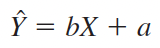

**Все ответы округлите до сотых**

- Рассчитайте сумму квадратов отклонений (SSx) для переменной, выражающей **процент вышедших на пенсию**

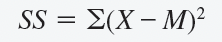

In [24]:
SSx = ((df["ret"]-df["ret"].mean())**2).sum()
SSx

508.66666666666663

- Рассчитайте сумму квадратов отклонений (SSy)  для переменной **со средними результатами тестов**

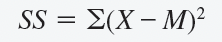

In [25]:
SSy = ((df["mem"]-df["mem"].mean())**2).sum()
SSy

0.6666666666666666

- Рассчитайте сумму произведений отклонений (SP)

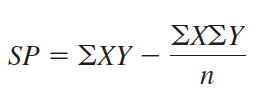

In [26]:
SSp = ((df["ret"]-df["ret"].mean())*(df["mem"]-df["mem"].mean())).sum()
SSp

-4.333333333333332

In [34]:
SSp = (df['ret'] * df['mem']).sum() - (df['ret'].sum() * df['mem'].sum()) / df.shape[0]
SSp

-4.3333333333332575

- Рассчитайте коэффициент независимой переменной в уравнении регрессии (b), если мы предсказываем среднее значение теста на память по стране

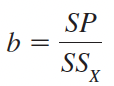

In [ ]:
b = SSp/SSx
round(b,2)

-0.01

- Рассчитайте свободный коэффициент в уравнении регрессии (a), если мы предсказываем среднее значение теста на память по стране

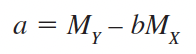

In [ ]:
a = df["mem"].mean()-b*df["ret"].mean()
a

9.77916120576671